In [1]:
import os
import pandas as pd

In [2]:
data_dir = "data"
data_folder = "aclImdb"
data_url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
filename = "aclImdb_v1.tar.gz"
sample_idx = 42
cache_dir = os.path.join("cache", "sentiment_analysis")
pytorch_dir = 'data/pytorch' # The folder we will use for storing data

### Step 1: Downloading the data

In [3]:
import tarfile
from urllib.request import urlretrieve
from pathlib import Path

def download_data(data_dir, data_url, filename):
    Path(data_dir).mkdir(parents=True, exist_ok=True)
    download = urlretrieve(url=data_url, filename=Path(data_dir).joinpath(filename))
    tar = tarfile.open(name=download[0], mode='r|*')
    tar.extractall(data_dir)
    tar.close()

In [ ]:
download_data(data_dir, data_url, filename)

In [4]:
import os
import glob
from pathlib import Path

def read_imdb_data(data_dir, data_folder):
    imdb_dir = Path(data_dir).joinpath(data_folder)
    data = {}
    labels = {}
    
    for data_type in ['train', 'test']:
        data[data_type] = {}
        labels[data_type] = {}
        
        for sentiment in ['pos', 'neg']:
            data[data_type][sentiment] = []
            labels[data_type][sentiment] = []
            
            path = os.path.join(imdb_dir, data_type, sentiment, '*.txt')
            files = glob.glob(path)
            
            for f in files:
                with open(f) as review:
                    data[data_type][sentiment].append(review.read())
                    # Here we represent a positive review by '1' and a negative review by '0'
                    labels[data_type][sentiment].append(1 if sentiment == 'pos' else 0)
                    
            assert len(data[data_type][sentiment]) == len(labels[data_type][sentiment]), \
                    "{}/{} data size does not match labels size".format(data_type, sentiment)
                
    return data, labels

In [5]:
data, labels = read_imdb_data(data_dir, data_folder)

In [6]:
print("IMDB reviews: train = {} pos / {} neg, test = {} pos / {} neg".format(
            len(data['train']['pos']), len(data['train']['neg']),
            len(data['test']['pos']), len(data['test']['neg'])))

IMDB reviews: train = 12500 pos / 12500 neg, test = 12500 pos / 12500 neg


In [7]:
from sklearn.utils import shuffle

def prepare_imdb_data(data, labels):
    """Prepare training and test sets from IMDb movie reviews."""
    
    #Combine positive and negative reviews and labels
    data_train = data['train']['pos'] + data['train']['neg']
    data_test = data['test']['pos'] + data['test']['neg']
    labels_train = labels['train']['pos'] + labels['train']['neg']
    labels_test = labels['test']['pos'] + labels['test']['neg']
    
    #Shuffle reviews and corresponding labels within training and test sets
    data_train, labels_train = shuffle(data_train, labels_train)
    data_test, labels_test = shuffle(data_test, labels_test)
    
    # Return a unified training data, test data, training labels, test labets
    return data_train, data_test, labels_train, labels_test

In [8]:
train_valid_X, test_X, train_valid_y, test_y = prepare_imdb_data(data, labels)

In [9]:
from sklearn.model_selection import train_test_split

def split_train_validation_data(train_valid_X, train_valid_y, valid_size=0.3, random_state=42):
    train_X, valid_X, train_y, valid_y = train_test_split(train_valid_X,
                                                          train_valid_y, 
                                                          test_size=valid_size, 
                                                          random_state=random_state)
    return train_X, valid_X, train_y, valid_y

In [10]:
train_X, valid_X, train_y, valid_y = split_train_validation_data(train_valid_X, train_valid_y, valid_size=0.3)

In [11]:
print("IMDb reviews (combined): train = {}, valid = {}, test = {}".format(len(train_X), len(valid_X),len(test_X)))

IMDb reviews (combined): train = 17500, valid = 7500, test = 25000


In [12]:
print(f"sentiment: {train_y[sample_idx]}")
print(f"review: {train_X[sample_idx]}")

sentiment: 0
review: I couldn't believe how lame & pointless this was. Basically there is nothing to laugh at in the movie, hardly any scenes to get you interested in the rest of the movie. This movie pulled in some huge stars but they were all wasted in my opinion. I think Keanu Reeves must've taken some acting lessons a fews years after this movie before he stared in The Matrix. Uma Thurman looked very simple & humble. Luckily i got this movie for a very low price because its certainly not a movie to remember for any good reasons. I won't write anything about the story of the movie, but as you should know that she is meant to be the most famous hitchhiker across America because of her huge thumb. I would give this movie a 2 / 10. Before I watched this movie I was wondering why this movie has only got a 4.0/10, & now I know why. A very disappointing movie. Don't buy it even if you see it for under $5.


In [13]:
print(f"sentiment: {valid_y[sample_idx]}")
print(f"review: {valid_X[sample_idx]}")

sentiment: 1
review: **** Includes Spoilers ****<br /><br />I've been a horror film fan now for many decades. Just when I think I've seen all the great ones another pops up to surprise me. I had never seen this film before. It was a treat, off the beaten path too...not just the path to the swamp ferry boat either. Here was a horror film made in the 1940s that dared to try something VERY different. The pretty girl is (gulp) fearless for a change and saves the men, including the man she loves, from the monster ! How is that for a twist. This girl was the complete opposite of most women in films of that time, no screaming at her own shadow, no fainting from fright, no tripping over a leaf as she runs. This gal wasn't afraid to live alone in a secluded hut far away from the rest of the villagers. Not only that but the place was on a foggy swamp rumored to be haunted. Heck she even takes naps on the swamp grass outdoors...like a regular 1940s version of Ripley. No snake, gator or ghostly st

In [14]:
print(f"sentiment: {test_y[sample_idx]}")
print(f"review: {test_X[sample_idx]}")

sentiment: 1
review: Why do I give this 1974 porn movie 7 points? Because I watched it. And I found it hilarious! Aliens, their weird spaceship, their weird helmets... my God, was that a sight. And all what these desperate alien women need is semen from the earth.<br /><br />And where do they look for it? In upper Bavaria, Germany. And that is where the main fun comes from: In Europe (and more so in German-speaking countries), Bavaria is seen as a traditional and backward region. And then the actors are so helpless with the alien women. Well, there have been films about people being unable to deal with women like the "American Pie" series.<br /><br />But what this film achieved is a true, funny weirdness. You constantly wonder how they came up with these crackpot ideas. But it was 1974, and looking back 35 years fills one with a kind of nostalgia. You've never seen a film like that.<br /><br />And if you don't mind seeing the casual pubic hairs and breasts, watch it once. It is a comed

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *

import re
from bs4 import BeautifulSoup

def review_to_words(review):
    nltk.download("stopwords", quiet=True)
    stemmer = PorterStemmer()
    
    text = BeautifulSoup(review, "html.parser").get_text() # Remove HTML tags
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower()) # Convert to lower case
    words = text.split() # Split string into words
    words = [w for w in words if w not in stopwords.words("english")] # Remove stopwords
    words = [PorterStemmer().stem(w) for w in words] # stem
    
    return words

In [16]:
print(review_to_words(train_X[sample_idx]))

['believ', 'lame', 'pointless', 'basic', 'noth', 'laugh', 'movi', 'hardli', 'scene', 'get', 'interest', 'rest', 'movi', 'movi', 'pull', 'huge', 'star', 'wast', 'opinion', 'think', 'keanu', 'reev', 'must', 'taken', 'act', 'lesson', 'few', 'year', 'movi', 'stare', 'matrix', 'uma', 'thurman', 'look', 'simpl', 'humbl', 'luckili', 'got', 'movi', 'low', 'price', 'certainli', 'movi', 'rememb', 'good', 'reason', 'write', 'anyth', 'stori', 'movi', 'know', 'meant', 'famou', 'hitchhik', 'across', 'america', 'huge', 'thumb', 'would', 'give', 'movi', '2', '10', 'watch', 'movi', 'wonder', 'movi', 'got', '4', '0', '10', 'know', 'disappoint', 'movi', 'buy', 'even', 'see', '5']


In [17]:
print(review_to_words(valid_X[sample_idx]))

['includ', 'spoiler', 'horror', 'film', 'fan', 'mani', 'decad', 'think', 'seen', 'great', 'one', 'anoth', 'pop', 'surpris', 'never', 'seen', 'film', 'treat', 'beaten', 'path', 'path', 'swamp', 'ferri', 'boat', 'either', 'horror', 'film', 'made', '1940', 'dare', 'tri', 'someth', 'differ', 'pretti', 'girl', 'gulp', 'fearless', 'chang', 'save', 'men', 'includ', 'man', 'love', 'monster', 'twist', 'girl', 'complet', 'opposit', 'women', 'film', 'time', 'scream', 'shadow', 'faint', 'fright', 'trip', 'leaf', 'run', 'gal', 'afraid', 'live', 'alon', 'seclud', 'hut', 'far', 'away', 'rest', 'villag', 'place', 'foggi', 'swamp', 'rumor', 'haunt', 'heck', 'even', 'take', 'nap', 'swamp', 'grass', 'outdoor', 'like', 'regular', '1940', 'version', 'ripley', 'snake', 'gator', 'ghostli', 'strangler', 'would', 'dare', 'bother', 'gal', 'book', 'earli', 'feminist', 'film', 'sure', 'includ', 'overlook', 'work', 'see', 'fan', 'like', 'wonder', 'atmospher', 'classic', 'b', 'w', 'horror', 'film', 'made', '30', '4

In [18]:
print(review_to_words(test_X[sample_idx]))

['give', '1974', 'porn', 'movi', '7', 'point', 'watch', 'found', 'hilari', 'alien', 'weird', 'spaceship', 'weird', 'helmet', 'god', 'sight', 'desper', 'alien', 'women', 'need', 'semen', 'earth', 'look', 'upper', 'bavaria', 'germani', 'main', 'fun', 'come', 'europ', 'german', 'speak', 'countri', 'bavaria', 'seen', 'tradit', 'backward', 'region', 'actor', 'helpless', 'alien', 'women', 'well', 'film', 'peopl', 'unabl', 'deal', 'women', 'like', 'american', 'pie', 'seri', 'film', 'achiev', 'true', 'funni', 'weird', 'constantli', 'wonder', 'came', 'crackpot', 'idea', '1974', 'look', 'back', '35', 'year', 'fill', 'one', 'kind', 'nostalgia', 'never', 'seen', 'film', 'like', 'mind', 'see', 'casual', 'pubic', 'hair', 'breast', 'watch', 'comedi', 'essenti', 'porn', 'flick']


In [19]:
import pickle
from tqdm import tqdm


os.makedirs(cache_dir, exist_ok=True)  # ensure cache directory exists
def preprocess_data(data_train, data_test, data_valid, 
                    labels_train, labels_test, labels_valid,
                    cache_dir=cache_dir, cache_file="preprocessed_data.pkl"):
    """Convert each review to words; read from cache if available."""
    # If cache_file is not None, try to read from it first
    cache_data = None
    if cache_file is not None:
        try:
            with open(os.path.join(cache_dir, cache_file), "rb") as f:
                cache_data = pickle.load(f)
            print("Read preprocessed data from cache file:", cache_file)
        except:
            pass  # unable to read from cache, but that's okay
    # If cache is missing, then do the heavy lifting
    if cache_data is None:
        # Preprocess training and test data to obtain words for each review
        #words_train = list(map(review_to_words, data_train))
        #words_test = list(map(review_to_words, data_test))
        words_train = [review_to_words(review) for review in tqdm(data_train)]
        words_valid = [review_to_words(review) for review in tqdm(data_valid)]
        words_test = [review_to_words(review) for review in tqdm(data_test)]
        # Write to cache file for future runs
        if cache_file is not None:
            cache_data = dict(words_train=words_train, words_test=words_test,words_valid=words_valid,
                              labels_train=labels_train, labels_test=labels_test, labels_valid=labels_valid)
            with open(os.path.join(cache_dir, cache_file), "wb") as f:
                pickle.dump(cache_data, f)
            print("Wrote preprocessed data to cache file:", cache_file)
    else:
        # Unpack data loaded from cache file
        words_train, words_test, words_valid, labels_train, labels_test, labels_valid = (cache_data['words_train'],
                cache_data['words_test'], cache_data['words_valid'], 
                cache_data['labels_train'], cache_data['labels_test'], cache_data['labels_valid'])
    return words_train, words_test, words_valid, labels_train, labels_test, labels_valid

In [20]:
train_pp_X, test_pp_X, valid_pp_X, train_pp_y, test_pp_y, valid_pp_y = preprocess_data(train_X, test_X, valid_X,
                                                                           train_y, test_y, valid_y)

Read preprocessed data from cache file: preprocessed_data.pkl


In [21]:
import numpy as np

def build_dict(data, vocab_size = 5000):
    """Construct and return a dictionary mapping each of the most frequently appearing words to a unique integer."""
    
    # TODO: Determine how often each word appears in `data`. Note that `data` is a list of sentences and that a
    #       sentence is a list of words.

    flatten_data = [word for review in data for word in review]
    (unique, counts) = np.unique(flatten_data, return_counts=True)   

    # word_count = {}
    # A dict storing the words that appear in the reviews along with how often they occur
    word_count = zip_word_count = {x:y for x,y in zip(unique, counts)}
    
    # TODO: Sort the words found in `data` so that sorted_words[0] is the most frequently appearing word and
    #       sorted_words[-1] is the least frequently appearing word.
    #sorted_zip_word_count = [{key: value} for (key, value) in sorted(zip_word_count.items(), key=lambda x: x[1], reverse=True)]
    #sorted_words = dict((key, val) for k in sorted_zip_word_count for key, val in k.items())
    sorted_words = list(key for (key, value) in sorted(zip_word_count.items(), key=lambda x: x[1], reverse=True))
    word_dict = {} # This is what we are building, a dictionary that translates words into integers
    for idx, word in enumerate(sorted_words[:vocab_size - 2]): # The -2 is so that we save room for the 'no word'
         word_dict[word] = idx + 2                              # 'infrequent' labels
        
    return word_dict, sorted_words, word_count

In [22]:
word_dict, sorted_words, word_count = build_dict(train_pp_X)

In [23]:
pd.DataFrame(word_count.items(), columns = ["word", "count"]).sort_values(by="count",ascending=False).head(5)

,word,count
26222,movi,36240
13990,film,33543
28037,one,19432
22751,like,16009
39435,time,11280


In [24]:
if not os.path.exists(pytorch_dir): # Make sure that the folder exists
    os.makedirs(pytorch_dir)

In [25]:
with open(os.path.join(pytorch_dir, 'word_dict_enhanced.pkl'), "wb") as f:
    pickle.dump(word_dict, f)

In [26]:
import numpy as np

def convert_and_pad(word_dict, sentence, pad=500):
    NOWORD = 0 # We will use 0 to represent the 'no word' category
    INFREQ = 1 # and we use 1 to represent the infrequent words, i.e., words not appearing in word_dict
    
    working_sentence = [NOWORD] * pad
    
    for word_index, word in enumerate(sentence[:pad]):
        if word in word_dict:
            working_sentence[word_index] = word_dict[word]
        else:
            working_sentence[word_index] = INFREQ
            
    return working_sentence, min(len(sentence), pad)

def convert_and_pad_data(word_dict, data, pad=500):
    result = []
    lengths = []
    
    for sentence in tqdm(data,leave=True):
        converted, leng = convert_and_pad(word_dict, sentence, pad)
        result.append(converted)
        lengths.append(leng)
        
    return np.array(result), np.array(lengths)

In [27]:
train_tf_X, train_X_tf_len = convert_and_pad_data(word_dict, train_pp_X)

100%|██████████| 17500/17500 [00:00<00:00, 30426.08it/s]


In [28]:
test_tf_X, test_X_tf_len = convert_and_pad_data(word_dict, test_pp_X)

100%|██████████| 25000/25000 [00:00<00:00, 28654.93it/s]


In [29]:
valid_tf_X, valid_X_tf_len = convert_and_pad_data(word_dict, valid_pp_X)

100%|██████████| 7500/7500 [00:00<00:00, 32224.15it/s]


In [30]:
import pandas as pd
    
pd.concat([pd.DataFrame(train_y), pd.DataFrame(train_X_tf_len), pd.DataFrame(train_tf_X)], axis=1) \
        .to_csv(os.path.join(pytorch_dir, 'train.csv'), header=False, index=False)

pd.concat([pd.DataFrame(valid_y), pd.DataFrame(valid_X_tf_len), pd.DataFrame(valid_tf_X)], axis=1) \
        .to_csv(os.path.join(pytorch_dir, 'valid.csv'), header=False, index=False)

In [31]:
import boto3
import sagemaker

sagemaker_session = sagemaker.Session(boto_session=boto3.session.Session(region_name="us-east-1"))

bucket = sagemaker_session.default_bucket()
prefix = 'sagemaker/sentiment_rnn'

try:
    role = sagemaker.get_execution_role()
except Exception as err:
    role = "arn:aws:iam::977053370764:role/service-role/AmazonSageMaker-ExecutionRole-20201202T141643"

Couldn't call 'get_role' to get Role ARN from role name aadelmo to get Role path.


In [32]:
input_data = sagemaker_session.upload_data(path=pytorch_dir, bucket=bucket, key_prefix=prefix)
input_data

's3://sagemaker-us-east-1-977053370764/sagemaker/sentiment_rnn'

In [33]:
import torch
import torch.utils.data

# Read in only the first 250 rows
train_sample = pd.read_csv(os.path.join(pytorch_dir, 'train.csv'), header=None, names=None, nrows=250)
valid_sample = pd.read_csv(os.path.join(pytorch_dir, 'valid.csv'), header=None, names=None, nrows=250)

# Turn the input pandas dataframe into tensors
train_sample_y = torch.from_numpy(train_sample[[0]].values).float().squeeze()
train_sample_X = torch.from_numpy(train_sample.drop([0], axis=1).values).long()

valid_sample_y = torch.from_numpy(valid_sample[[0]].values).float().squeeze()
valid_sample_X = torch.from_numpy(valid_sample.drop([0], axis=1).values).long()

# Build the dataset
train_sample_ds = torch.utils.data.TensorDataset(train_sample_X, train_sample_y)
valid_sample_ds = torch.utils.data.TensorDataset(valid_sample_X, valid_sample_y)

# Build the dataloader
train_sample_dl = torch.utils.data.DataLoader(train_sample_ds, batch_size=50)
valid_sample_dl = torch.utils.data.DataLoader(valid_sample_ds, batch_size=50)

In [34]:
%matplotlib inline
import time
import pylab as pl
from IPython import display

def train(model, train_loader, valid_loader, epochs, optimizer, loss_fn, device):
    report_train = pd.DataFrame(columns=["epoch", "trainError", "validError"])
    best_valid_BCELoss = 9999999999
    BCELoss_list = []
    valid_BCELoss_list = []
    for epoch in tqdm(range(1, epochs + 1)):
        model.train()
        total_loss = 0
        total_valid_loss = 0        
        for batch in train_loader:         
            batch_X, batch_y = batch
            
            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)
            
            # TODO: Complete this train method to train the model provided.
            optimizer.zero_grad()
            output = model(batch_X)
            loss = loss_fn(output, batch_y)
            loss.backward()
            optimizer.step()            
            total_loss += loss.data.item()
        for block in valid_loader:     
            block_X, block_y = block
            
            block_X = block_X.to(device)
            block_y = block_y.to(device)
            output_valid = model(block_X)
            valid_loss = loss_fn(output_valid, block_y)
            total_valid_loss += valid_loss.data.item()
        BCELoss = total_loss/len(train_loader)
        BCELoss_list.append(BCELoss)
        valid_BCELoss = total_valid_loss/len(valid_loader)
        valid_BCELoss_list.append(valid_BCELoss)
        if valid_BCELoss < best_valid_BCELoss: 
            dummy_input = torch.tensor(block_X).to(device).long()
            torch.onnx.export(model, dummy_input, f"models/best_model.onnx")
            best_valid_BCELoss = BCELoss
        
        desc = (f'Epoch: {epoch}, train_loss: {BCELoss}, valid_loss: {valid_BCELoss}')
        print(desc)
        to_append = [epoch, BCELoss, valid_BCELoss]
        report_train_length = len(report_train)
        report_train.loc[report_train_length] = to_append
        #print("Epoch: {}, BCELoss: {}".format(epoch, total_loss / len(train_loader)))
        display.clear_output(wait=True)
        if epoch == 1:
            pl.plot(BCELoss_list, '-b', label="TrainError")
            pl.plot(valid_BCELoss_list, '-r', label="ValidationError")
            pl.legend(loc='upper right')
        else:
            pl.plot(BCELoss_list, '-b')
            pl.plot(valid_BCELoss_list, '-r')
        pl.xlim(1, epochs)
        pl.ylim(0, 2)
        display.display(pl.gcf())
        time.sleep(1.0)
    return report_train, model

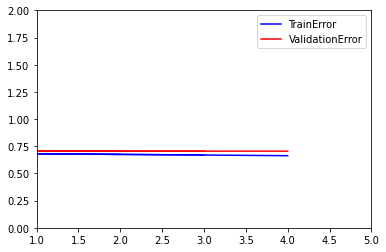

100%|██████████| 5/5 [00:12<00:00,  2.49s/it]


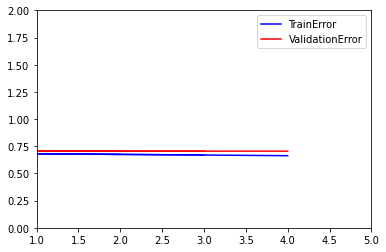

In [35]:
import torch.optim as optim
from train.model import LSTMClassifier

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMClassifier(64, 30, 5000).to(device)
optimizer = optim.Adam(model.parameters())
loss_fn = torch.nn.BCELoss()

report_train, trained_model = train(model, train_sample_dl, valid_sample_dl, 5, optimizer, loss_fn, device)

In [55]:
from sagemaker.pytorch import PyTorch

estimator = PyTorch(entry_point="train.py",
                    source_dir="enhanced",
                    py_version="py3",
                    role=role,
                    framework_version='0.4.0',
                    instance_count=1,
                    instance_type='ml.p2.xlarge',
#                   hyperparameters={
#                     'objective''binary:logistic'
# #                         'epochs': 10,
# #                         'hidden_dim': 200,
#                     }
                   )

In [56]:
from sagemaker.tuner import IntegerParameter, ContinuousParameter, HyperparameterTuner

In [57]:
xgb_hyperparameter_tuner = HyperparameterTuner(estimator = estimator, # The estimator object to use as the basis for the training jobs.
                                               objective_metric_name = 'validation:loss',
                                               metric_definitions = [{'Name': 'validation:loss',
                       'Regex': 'loss (\S+)'}],# The metric used to compare trained models.
                                               objective_type = 'Minimize', # Whether we wish to minimize or maximize the metric.
                                               max_jobs = 2, # The total number of models to train
                                               max_parallel_jobs = 1, # The number of models to train in parallel
                                               hyperparameter_ranges = {
                                                    'epochs': IntegerParameter(3, 10),
                                                    'hidden_dim': IntegerParameter(50, 200),
                                                    'embedding_dim': IntegerParameter(32, 64)
                                               })

In [ ]:
xgb_hyperparameter_tuner.fit({'training': input_data})

........................................

In [ ]:
predicted_values = []

In [ ]:
n_test_sample = len(test_y)

In [ ]:
for idx in tqdm(range(n_test_sample)):
    pr_data_X = test_tf_X[idx]
    pr_data_len = test_X_tf_len[idx]
    pr_data_pack = np.hstack((pr_data_len, pr_data_X))
    pr_data_pack = pr_data_pack.reshape(1, -1)
    pr_data = torch.from_numpy(pr_data_pack)
    pr_data = pr_data.to(device)
    model.eval()
    result = model(pr_data).detach().numpy()
    predicted_values.append(result)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc = roc_auc_score(test_y[:n_test_sample], predicted_values)
fpr, tpr, _ = roc_curve(test_y[:n_test_sample], predicted_values)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y[:n_test_sample], np.rint(predicted_values))

In [ ]:
confusion_matrix(test_y[:n_test_sample], np.rint(predicted_values))